**Prompt**

The goal of this competition is to develop a model that detects personally identifiable information (PII) in student writing. Your efforts to automate the detection and removal of PII from educational data will lower the cost of releasing educational datasets. This will support learning science research and the development of educational tools.

Reliable automated techniques could allow researchers and industry to tap into the potential that large public educational datasets offer to support the development of effective tools and interventions for supporting teachers and students.

**Description**

In today’s era of abundant educational data from sources such as ed tech, online learning, and research, widespread PII is a key challenge. PII’s presence is a barrier to analyze and create open datasets that advance education because releasing the data publicly puts students at risk. To reduce these risks, it’s crucial to screen and cleanse educational data for PII before public release, which data science could streamline.

Manually reviewing the entire dataset for PII is currently the most reliable screening method, but this results in significant costs and restricts the scalability of educational datasets. While techniques for automatic PII detection that rely on named entity recognition (NER) exist, these work best for PII that share common formatting such as emails and phone numbers. PII detection systems struggle to correctly label names and distinguish between names that are sensitive (e.g., a student's name) and those that are not (e.g., a cited author).
Competition host Vanderbilt University is a private research university in Nashville, Tennessee. It offers 70 undergraduate majors and a full range of graduate and professional degrees across 10 schools and colleges, all on a beautiful campus with state-of-the-art laboratories. Vanderbilt is optimized to inspire and nurture cross-disciplinary research that fosters groundbreaking discoveries.
For this competition, Vanderbilt has partnered with The Learning Agency Lab, an Arizona-based independent nonprofit focused on developing the science of learning-based tools and programs for the social good.

Your work in creating reliable automated techniques to detect PII will lead to more high-quality public educational datasets. Researchers can then tap into the potential of this previously unavailable data to develop effective tools and interventions that benefit both teachers and students.

**Evaluation**

Submissions are evaluated on micro 𝐹𝛽, which is a classification metric that assigns value to recall and precision. The value of 𝛽 is set to 5, which means that recall is weighted 5 times more heavily than precision.

**Dataset Description**

The competition dataset comprises approximately 22,000 essays written by students enrolled in a massively open online course. All of the essays were written in response to a single assignment prompt, which asked students to apply course material to a real-world problem. The goal of the competition is to annotate personally identifiable information (PII) found within the essays.

In order to protect student privacy, the original PII in the dataset has been replaced by surrogate identifiers of the same type using a partially automated process. A majority of the essays are reserved for the test set (70%), so competitors are encouraged to use external datasets that are publicly available to bolster the training data.

**PII Types**

The competition asks competitors to assign labels to the following seven types of PII:

NAME_STUDENT - The full or partial name of a student that is not necessarily the author of the essay. This excludes instructors, authors, and other person names.

EMAIL - A student’s email address.

USERNAME - A student's username on any platform.

ID_NUM - A number or sequence of characters that could be used to identify a student, such as a student ID or a social security number.

PHONE_NUM - A phone number associated with a student.

URL_PERSONAL - A URL that might be used to identify a student.

STREET_ADDRESS - A full or partial street address that is associated with the student, such as their home address.


**Loading Dataset**

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_json('data/train.json')
test = pd.read_json('data/test.json')

In [6]:
train.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


In [7]:
test.head()

,document,full_text,tokens,trailing_whitespace
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal..."


**Missing Values:**

In [39]:
train.isna().sum()

document               0
full_text              0
tokens                 0
trailing_whitespace    0
labels                 0
dtype: int64

There are no missing values.

**Are documents unique?**

In [5]:
train.document.value_counts()

7        1
17636    1
17633    1
17632    1
17628    1
        ..
12220    1
12217    1
12216    1
12215    1
22687    1
Name: document, Length: 6807, dtype: int64

In [8]:
train.full_text.nunique()

6807

All essays are unique.

**Taking a look at a particular sample:**

In [8]:
train.full_text[0]

"Design Thinking for innovation reflexion-Avril 2021-Nathalie Sylla\n\nChallenge & selection\n\nThe tool I use to help all stakeholders finding their way through the complexity of a project is the  mind map.\n\nWhat exactly is a mind map? According to the definition of Buzan T. and Buzan B. (1999, Dessine-moi  l'intelligence. Paris: Les Éditions d'Organisation.), the mind map (or heuristic diagram) is a graphic  representation technique that follows the natural functioning of the mind and allows the brain's  potential to be released. Cf Annex1\n\nThis tool has many advantages:\n\n•  It is accessible to all and does not require significant material investment and can be done  quickly\n\n•  It is scalable\n\n•  It allows categorization and linking of information\n\n•  It can be applied to any type of situation: notetaking, problem solving, analysis, creation of  new ideas\n\n•  It is suitable for all people and is easy to learn\n\n•  It is fun and encourages exchanges\n\n•  It makes visi

In [11]:
len(train.tokens[0])

753

In [16]:
len(train.labels[0])

753

In [17]:
len(train.trailing_whitespace[0])

753

There is one trailing_whitespace and label entry for each token.

**Example of correctly labelled name:**

In [40]:
df1 = {'tokens' : train.tokens[0],
       'labels' : train.labels[0]}
df1 = pd.DataFrame(df1)
df1[df1.labels != "O"]

,tokens,labels
9,Nathalie,B-NAME_STUDENT
10,Sylla,I-NAME_STUDENT
482,Nathalie,B-NAME_STUDENT
483,Sylla,I-NAME_STUDENT
741,Nathalie,B-NAME_STUDENT
742,Sylla,I-NAME_STUDENT


**Label Counts**

<Axes: xlabel='Count', ylabel='labels'>

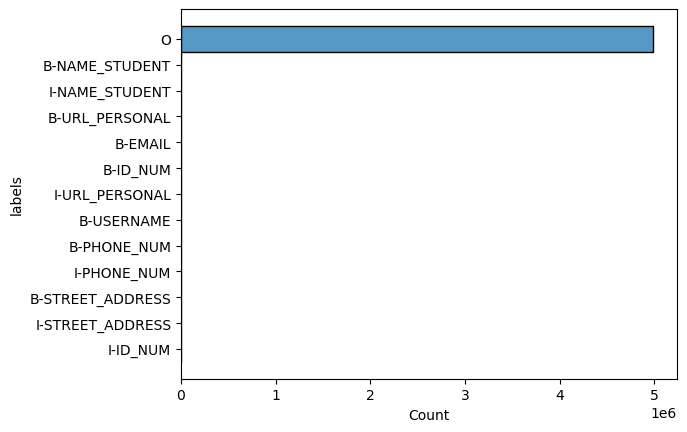

In [14]:
sns.histplot(pd.DataFrame(train.labels.explode().reset_index(drop = True)), y = 'labels')

In [15]:
train.labels.explode().value_counts()

O                   4989794
B-NAME_STUDENT         1365
I-NAME_STUDENT         1096
B-URL_PERSONAL          110
B-ID_NUM                 78
B-EMAIL                  39
I-STREET_ADDRESS         20
I-PHONE_NUM              15
B-USERNAME                6
B-PHONE_NUM               6
B-STREET_ADDRESS          2
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: labels, dtype: int64

In [19]:
train.labels.explode()[train.labels.explode() != "O"].value_counts().sum()

2739

Only 2739 out of the almost 5 million words have labels. The data is very imbalanced.

**Another example of a student assignment. This example contains some extra symbols with every word and is less readable. This indicates that essays will not always be formatted properly.**

In [20]:
train.full_text[4]

'Assignment:\xa0 Visualization\xa0Reflection\xa0 Submitted\xa0by:\xa0Nadine Born\xa0 Course:\xa0 Design\xa0Thinking\xa0for\xa0Innovation\xa0 \xa0 Trail\xa0Challenge:\xa0To\xa0Build\xa0or\xa0Not\xa0to\xa0Build\xa0 \xa0 An\xa0environmental\xa0charity\xa0wanted\xa0to\xa0conduct\xa0a\xa0fundraising\xa0campaign\xa0to\xa0raise\xa0$4\xa0million\xa0to\xa0build\xa0a\xa0 public\xa0path\xa0in\xa0a\xa0busy\xa0tourist\xa0area\xa0of\xa0a\xa0small\xa0town\xa0in\xa0British\xa0Columbia,\xa0Canada.\xa0They\xa0had\xa0been\xa0gifted\xa0a\xa0 large\xa0piece\xa0of\xa0land\xa0by\xa0a\xa0local\xa0landowner,\xa0which\xa0was\xa0a\xa0substantial\xa0gift\xa0and\xa0prevented\xa0them\xa0from\xa0 needing\xa0to\xa0purchase\xa0the\xa0land,\xa0however,\xa0they\xa0still\xa0needed\xa0to\xa0raise\xa0a\xa0large\xa0amount\xa0of\xa0money\xa0in\xa0order\xa0to\xa0 pay\xa0for\xa0the\xa0supplies\xa0and\xa0labor\xa0to\xa0build\xa0the\xa0trail.\xa0\xa0 \xa0 Even\xa0though\xa0the\xa0local\xa0community\xa0appeared\xa0to\xa0be\xa0sup

In [21]:
#There are only two tokens in this entire essay!
df4 = pd.DataFrame({"tokens": train.tokens[4],
                    "label" : train.labels[4]})
df4[df4.label != "O"]

,tokens,label
12,Nadine,B-NAME_STUDENT
13,Born,I-NAME_STUDENT


**What are some labels that aren't student names?**

In [35]:
token_labels = pd.DataFrame({"tokens": list(train.tokens.explode().reset_index(drop=True)),
                             "label": list(train.labels.explode().reset_index(drop=True))})
token_labels[~token_labels.label.isin(["O",'B-NAME_STUDENT','I-NAME_STUDENT'])]

,tokens,label
15979,https://www.jackson.com/list/explorehomepage.htm,B-URL_PERSONAL
20978,djones@gmail.com,B-EMAIL
20981,https://www.linkedin.com/in/mmartinez,B-URL_PERSONAL
23325,https://youtu.be/rFD2lJuvace,B-URL_PERSONAL
24543,860632713425,B-ID_NUM
...,...,...
2840591,IV-8322,B-ID_NUM
2841190,IV-8322,B-ID_NUM
3889614,Z.S.,B-ID_NUM
3889615,30407059,I-ID_NUM


In [151]:
token_labels[token_labels.label == 'I-URL_PERSONAL']

,tokens,label
83770,nYZqnhEXw,I-URL_PERSONAL


In [152]:
token_labels[83769:83772]

,tokens,label
83769,https://www.youtube.com/channel/UC1ElAcppeuhfet,B-URL_PERSONAL
83770,nYZqnhEXw,I-URL_PERSONAL
83771,\n\n,O


In [154]:
token_labels[token_labels.label == 'I-STREET_ADDRESS']

,tokens,label
861200,Smith,I-STREET_ADDRESS
861201,Centers,I-STREET_ADDRESS
861202,Apt,I-STREET_ADDRESS
861203,.,I-STREET_ADDRESS
861204,656,I-STREET_ADDRESS
861205,\n,I-STREET_ADDRESS
861206,Joshuamouth,I-STREET_ADDRESS
861207,",",I-STREET_ADDRESS
861208,RI,I-STREET_ADDRESS
861209,95963,I-STREET_ADDRESS


In [156]:
token_labels[token_labels.label == 'I-PHONE_NUM']

,tokens,label
150910,320)202,I-PHONE_NUM
150911,-,I-PHONE_NUM
150912,0688x95843,I-PHONE_NUM
179881,223)392,I-PHONE_NUM
179882,-,I-PHONE_NUM
179883,2765,I-PHONE_NUM
286836,820)913,I-PHONE_NUM
286837,-,I-PHONE_NUM
286838,3241x894,I-PHONE_NUM
287267,820)913,I-PHONE_NUM


In [161]:
token_labels[token_labels.label == 'B-ID_NUM'].head(50)

,tokens,label
24543,860632713425,B-ID_NUM
24556,530670102508,B-ID_NUM
24567,530670102508,B-ID_NUM
24573,875673967537,B-ID_NUM
24579,860632713425,B-ID_NUM
24585,557349702179,B-ID_NUM
24591,784372734211,B-ID_NUM
24597,054176622314,B-ID_NUM
24606,674915248960,B-ID_NUM
80831,932353568953,B-ID_NUM


In [159]:
token_labels[token_labels.label == 'I-ID_NUM']

,tokens,label
3889615,30407059,I-ID_NUM


In [162]:
token_labels[token_labels.label == 'B-STREET_ADDRESS']

,tokens,label
861199,591,B-STREET_ADDRESS
1445330,743,B-STREET_ADDRESS


In [163]:
#Context of the given street address. What's the difference between B-STREET_ADDRESS and I-STREET_ADDRESS?
token_labels[861190:861203]

,tokens,label
861190,concentrate,O
861191,on,O
861192,them,O
861193,",",O
861194,too,O
861195,\n\n,O
861196,Waseem,B-NAME_STUDENT
861197,Mabunda,I-NAME_STUDENT
861198,,O
861199,591,B-STREET_ADDRESS


In [164]:
token_labels[1445325:1445335]

,tokens,label
1445325,(,O
1445326,1861,O
1445327,.,O
1445328,Milano,O
1445329,-,O
1445330,743,B-STREET_ADDRESS
1445331,Erika,I-STREET_ADDRESS
1445332,Bypass,I-STREET_ADDRESS
1445333,Apt,I-STREET_ADDRESS
1445334,.,I-STREET_ADDRESS


In [57]:
docs.iloc[1318273:1318277,:]

,document,tokens,labels
1318273,11108,design,O
1318274,11108,thinking,O
1318275,11108,@,O
1318276,11108,coursera,O


In [58]:
docs.iloc[2215796:2215801,:]

,document,tokens,labels
2215796,13574,the,O
2215797,13574,concept,O
2215798,13574,of,O
2215799,13574,Agile@scale,O
2215800,13574,into,O


The "@" sign is not always tied specifically to emails. Sometimes it's a standalone character.

There are website links that are not classified as personal urls. How do we distinguish between a personal URL and a generic website?

In [63]:
docs[docs.tokens.str.contains('\\.com')]

,document,tokens,labels
15979,317,https://www.jackson.com/list/explorehomepage.htm,B-URL_PERSONAL
20978,379,djones@gmail.com,B-EMAIL
20981,379,https://www.linkedin.com/in/mmartinez,B-URL_PERSONAL
43697,1447,https://miro.com,O
55536,1798,http://www.burns-lopez.com/categories/appabout...,B-URL_PERSONAL
...,...,...,...
4835456,22207,https://www.nngroup.com/articles/storyboards-v...,O
4875412,22332,​https://www.mindmeister.com​,O
4906552,22425,http://designresearchtechniques.com/casestudie...,O
4912230,22440,https://trello.com/,O


**Is there a way to distinguish student name from the name of the author the student is citing by where the name is located in the essay?** 

In [95]:
#How far in is the student's name in all documents with students' names?

name_stats = []
for d in unique_docs_with_names:
    #Create a list of labels for each document with student names
    labels = list(train.loc[train.document==d, 'labels'].explode().reset_index()['labels'])
    name_stats.append((labels.index('B-NAME_STUDENT') + 1 ) / len(labels)) 

In [98]:
name_stats = pd.DataFrame(name_stats)

In [101]:
name_stats.describe()

,0
count,891.000000
mean,0.145352
std,0.324069
min,0.000381
25%,0.002564
50%,0.008883
75%,0.021556
max,0.999117


<Axes: xlabel='Location', ylabel='Count'>

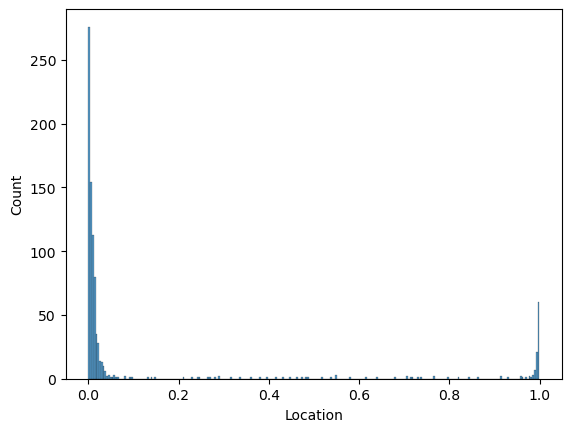

In [106]:
sns.histplot(name_stats.Location)

For 75% of entries, the name first occurs in the first 2% of the text entry. However, some entries do have the name at the end.

In [102]:
name_stats.columns = ['Location']

In [103]:
name_stats[name_stats.Location == name_stats.Location.max()]

,Location
652,0.999117


In [112]:
#Example of having the name at the back of the essay
train.full_text[1314]

"Challenge-\n\nI am heading marketing in ABC and my groups challenge is to improve on branding and establish  brand architecture for ABC .A well-defined brand architecture helps drive effectiveness in a brand  portfolio. When brands and their roles within a portfolio are clearly defined, there is internal and external clarity on  what the brands stand for a how a brand relates to other brands. A defined architecture helps present the brand  consistently across geographies and touch points. Clarity and consistency drive efficiencies – in marketing spends, in  synergizing efforts consistency and efficiency enhances the effectiveness of the brand in stronger brands.\n\nWe are, for the first time, defining a brand architecture strategy for the ABC. This will help us  leverage our most precious asset other brands in our portfolio to the fullest extent. Put simply, we are developing a  framework to help us decide on how we use the ABC brand, how we relate other brands to  ABC and finally, ho

In [114]:
#Let's take a look at another example of the name not exactly at the front of the essay:
name_stats[name_stats.Location == name_stats.Location.quantile(0.8)]

,Location
195,0.031579


In [117]:
train[train.document == unique_docs_with_names[195]]

,document,full_text,tokens,trailing_whitespace,labels
203,4574,Learning Launch\n\nChallenge\n\nMy name is Ann...,"[Learning, Launch, \n\n, Challenge, \n\n, My, ...","[True, False, False, False, False, True, True,...","[O, O, O, O, O, O, O, O, B-NAME_STUDENT, O, O,..."


In [118]:
train.full_text[203]

'Learning Launch\n\nChallenge\n\nMy name is Annie and surname is Annie. . I am very interested in programming and web design. I  have been doing graphic design since the 1st year of university and I was taught at the university what  programs to work with, but when the quarantine began in 2020 due to the coronavirus, I was forced to  study all other programs myself and I did it well, especially when I have a desire to strive for more\n\nSelection\n\nI have selected this because it is something more creative and using your brain and knowledge in  different situations which helped me in different scenarios to come up with a better solution\n\nApplication\n\nIt can be used in different field like in our education when we are preparing for a particular topic and it  can be applied in real time too. Using this mind mapping we can come up with a new way of thinking. It  helped me a lot by using this method\n\nInsight\n\nUsing this method I could think in many different ways to solve a partic

In [122]:
pd.DataFrame({'tokens': train.tokens[203],
              'labels': train.labels[203]}).head(25)
##This labelling system labels both names with B-NAME_STUDENT

,tokens,labels
0,Learning,O
1,Launch,O
2,\n\n,O
3,Challenge,O
4,\n\n,O
5,My,O
6,name,O
7,is,O
8,Annie,B-NAME_STUDENT
9,and,O


**Summary of Exploration:**

The tokenization given does not necessarily match tokenization used in other libraries such as NLTK. Finding a way to preserve the original tokenization so that it can match up with the labels will be vital in processing the data.

There are few rules that are widespread across all essays in this dataset, such as the location of the names, the placement of @ symbols, the format of ID numbers, and the format of punctuation and whitespace in general. While it would be good to determine some general principles to boost the accuracy of PII, the caveat is that this could become too specific to this particular dataset and not generalizable to all educational essays. It would be interesting to see what deep neural networks can learn and how they can perform compared to a rules-based approach.